In [30]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, LSTM, GRU, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [31]:
dataset_directory = r'\Images'

In [32]:
def load_images(directory):
    X = []
    y = []
    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        if os.path.isdir(category_dir):
            for filename in os.listdir(category_dir):
                if filename.endswith('.jpeg') or filename.endswith('.png'):
                    image_path = os.path.join(category_dir, filename)
                    image = Image.open(image_path)
                    image = image.resize((100, 100))
                    image = np.array(image)
                    X.append(image)
                    y.append(category)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [33]:
X, y = load_images(dataset_directory)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [36]:
inputs = Input(shape=(100, 100, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
cnn_outputs = Dense(len(label_encoder.classes_), activation='softmax')(x)

In [37]:
cnn_model = Model(inputs=inputs, outputs=cnn_outputs)
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2] * X_train.shape[3]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2] * X_test.shape[3]))

In [39]:
inputs_lstm = Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
x_lstm = LSTM(128)(inputs_lstm)
x_lstm = Dense(256, activation='relu')(x_lstm)
lstm_outputs = Dense(len(label_encoder.classes_), activation='softmax')(x_lstm)

In [40]:
lstm_model = Model(inputs=inputs_lstm, outputs=lstm_outputs)
lstm_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
inputs_gru = Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
x_gru = GRU(128)(inputs_gru)
x_gru = Dense(256, activation='relu')(x_gru)
gru_outputs = Dense(len(label_encoder.classes_), activation='softmax')(x_gru)

In [42]:
gru_model = Model(inputs=inputs_gru, outputs=gru_outputs)
gru_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
cnn_history = cnn_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 208ms/step - accuracy: 0.5424 - loss: 40.4417 - val_accuracy: 0.8049 - val_loss: 0.4539
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.8318 - loss: 0.4512 - val_accuracy: 0.7711 - val_loss: 0.5457
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.8013 - loss: 0.4777 - val_accuracy: 0.8386 - val_loss: 0.4427
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.8757 - loss: 0.3174 - val_accuracy: 0.8405 - val_loss: 0.4279
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.8787 - loss: 0.3077 - val_accuracy: 0.8443 - val_loss: 0.4637
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.8961 - loss: 0.2985 - val_accuracy: 0.8049 - val_loss: 0.5084
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 0.8744 - loss: 0.3483 - val_accuracy: 0.8424 - val_loss: 0.4761
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.9180 - loss: 0.2030 - val_acc

In [44]:
lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test_lstm, y_test)
)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.4534 - loss: 1.0391 - val_accuracy: 0.5610 - val_loss: 0.9219
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5641 - loss: 0.9370 - val_accuracy: 0.6642 - val_loss: 0.8138
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6045 - loss: 0.8807 - val_accuracy: 0.3884 - val_loss: 1.0167
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5031 - loss: 0.9520 - val_accuracy: 0.5872 - val_loss: 0.8860
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5719 - loss: 0.9026 - val_accuracy: 0.5347 - val_loss: 0.9043
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.5854 - loss: 0.8983 - val_accuracy: 0.5366 - val_loss: 0.9543
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5421 - loss: 0.9323 - val_accuracy: 0.6229 - val_loss: 0.8689
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6552 - loss: 0.8342 - val_accuracy: 0.6454 - v

In [45]:
gru_history = gru_model.fit(
    X_train_lstm, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test_lstm, y_test)
)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.4709 - loss: 1.0357 - val_accuracy: 0.6341 - val_loss: 0.8407
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6091 - loss: 0.8726 - val_accuracy: 0.6341 - val_loss: 0.8591
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.5845 - loss: 0.8858 - val_accuracy: 0.6660 - val_loss: 0.7813
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6337 - loss: 0.8356 - val_accuracy: 0.5947 - val_loss: 0.8691
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5984 - loss: 0.8586 - val_accuracy: 0.6248 - val_loss: 0.8346
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6383 - loss: 0.8351 - val_accuracy: 0.6304 - val_loss: 0.8148
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6158 - loss: 0.8496 - val_accuracy: 0.6735 - val_loss: 0.7894
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6761 - loss: 0.7872 - val_accuracy: 0.6454 - v

In [46]:
cnn_accuracy = cnn_history.history['val_accuracy'][-1]
lstm_accuracy = lstm_history.history['val_accuracy'][-1]
gru_accuracy = gru_history.history['val_accuracy'][-1]

In [47]:
print("CNN Accuracy:", cnn_accuracy)
print("LSTM Accuracy:", lstm_accuracy)
print("GRU Accuracy:", gru_accuracy)

CNN Accuracy: 0.8405253291130066
LSTM Accuracy: 0.6585366129875183
GRU Accuracy: 0.6848030090332031


In [48]:
best_model = cnn_model
best_accuracy = cnn_accuracy

if lstm_accuracy > best_accuracy:
    best_model = lstm_model
    best_accuracy = lstm_accuracy

if gru_accuracy > best_accuracy:
    best_model = gru_model
    best_accuracy = gru_accuracy

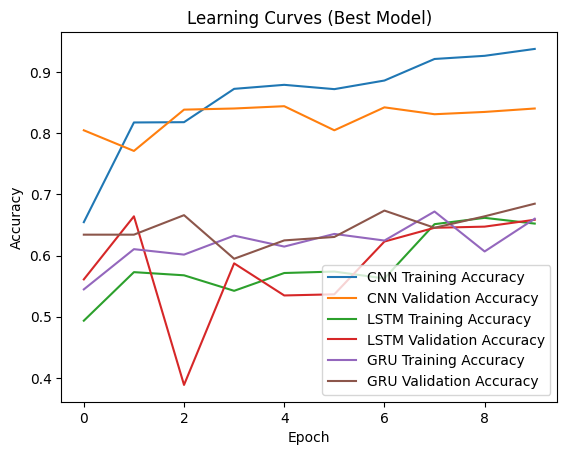

In [49]:
plt.figure()
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.title("Learning Curves (Best Model)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [50]:
subset_indices = np.random.choice(len(X_test), size=10, replace=False)
subset_images = X_test[subset_indices]
subset_labels = y_test[subset_indices]

In [51]:
subset_predictions = best_model.predict(subset_images)
subset_predicted_labels = np.argmax(subset_predictions, axis=1)
subset_predicted_labels = label_encoder.inverse_transform(subset_predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [52]:
subset_true_labels = label_encoder.inverse_transform(subset_labels)

Subset of Predicted Images:


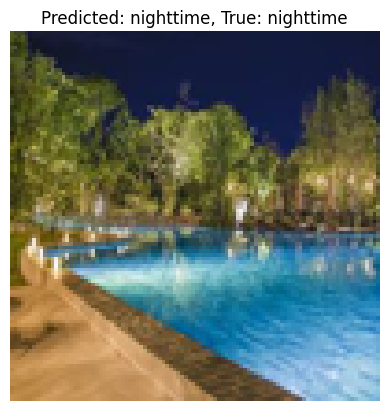

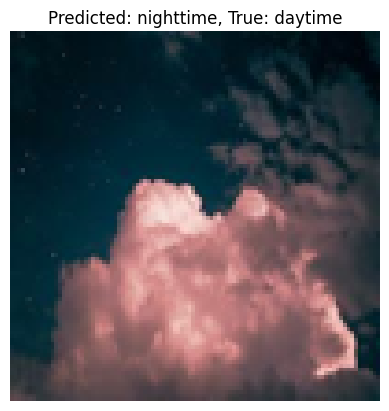

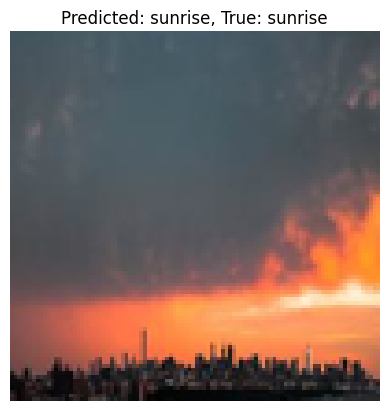

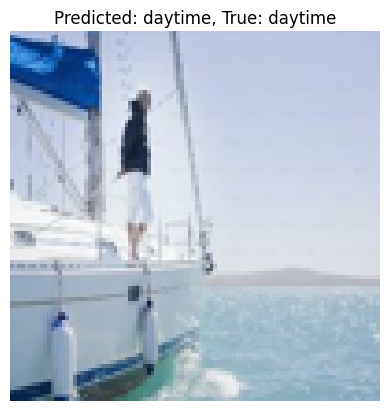

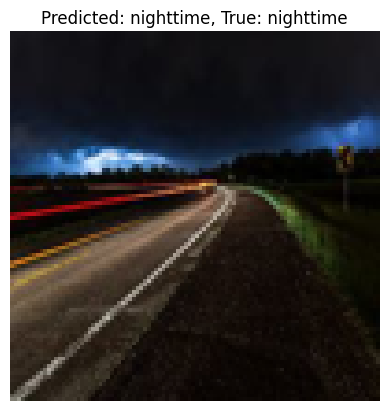

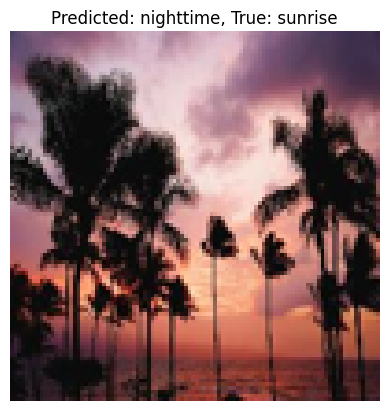

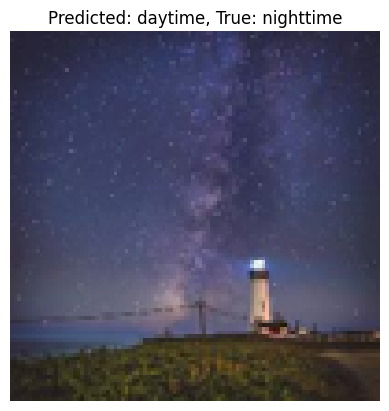

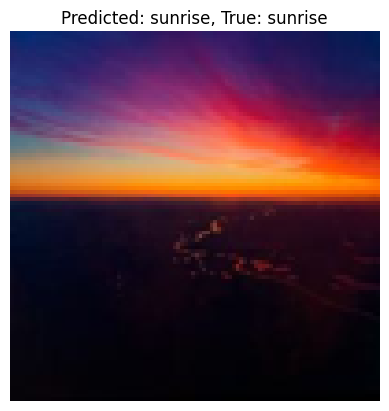

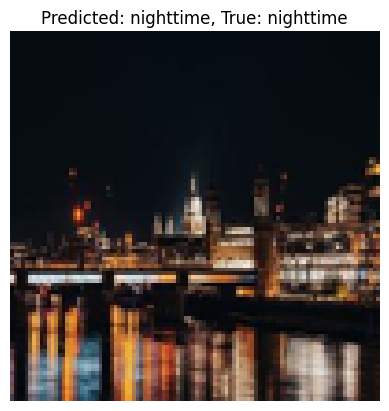

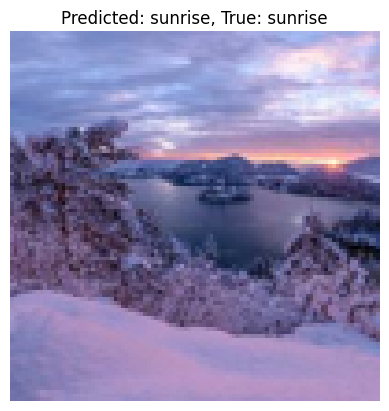

In [53]:
print("Subset of Predicted Images:")
for i in range(len(subset_images)):
    plt.figure()
    plt.imshow(subset_images[i])
    plt.title(f"Predicted: {subset_predicted_labels[i]}, True: {subset_true_labels[i]}")
    plt.axis('off')
    plt.show()